<a href="https://colab.research.google.com/github/VimalRency/Spectogram/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


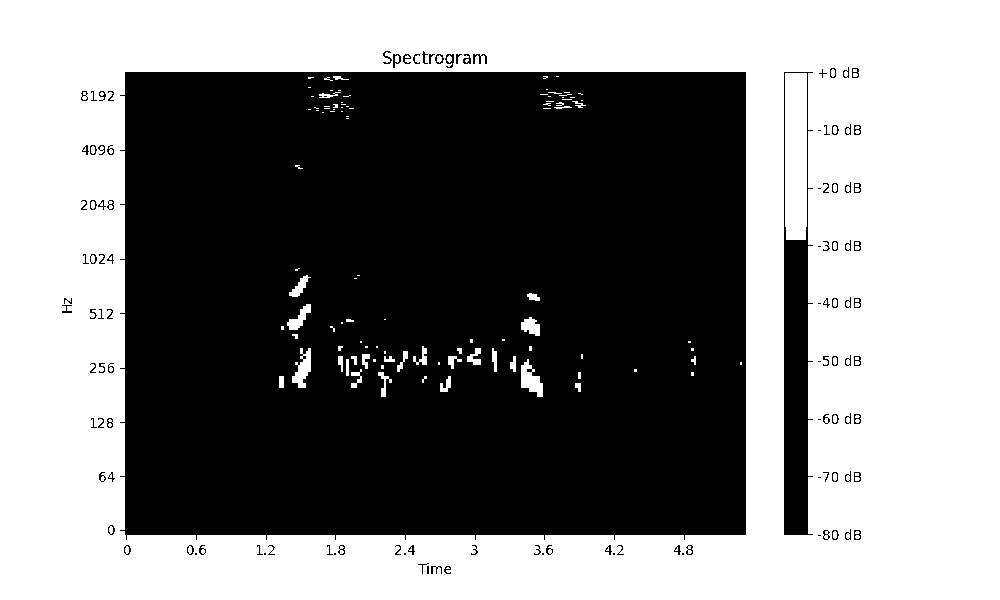

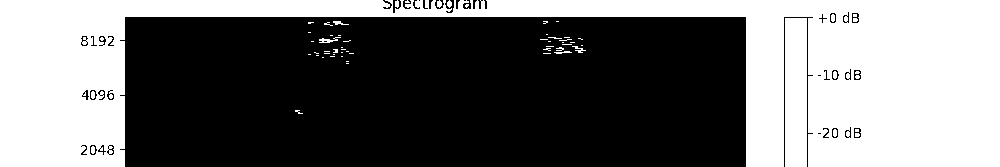

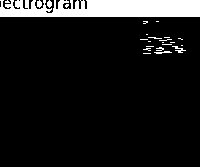

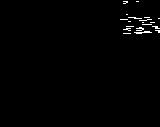

Number of white pixels in final cropped image: 181
Prediction: Yes


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

def crop_center_of_frequency_range(image_path, freq_range=(2048, 8192), sr=44100, central_crop_size=(200, 200), edge_crop_size=(20, 20)):
    # Load the image
    img = cv2.imread(image_path)
    graydata = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's threshold to create a binary image
    _, binary_image = cv2.threshold(graydata, 130, 255, cv2.THRESH_BINARY )

    # Define the maximum frequency range (e.g., Nyquist frequency)
    max_freq = sr // 2
    total_rows = graydata.shape[0]

    # Calculate row indices for frequency range
    freq_min_row = int((freq_range[0] / max_freq) * total_rows)
    freq_max_row = int((freq_range[1] / max_freq) * total_rows)

    # Ensure indices are within bounds
    freq_min_row = max(freq_min_row, 0)
    freq_max_row = min(freq_max_row, total_rows)

    # Crop the image to the specified frequency range
    cropped_image = binary_image[freq_min_row:freq_max_row, :]

    # Get dimensions of the cropped image
    cropped_height, cropped_width = cropped_image.shape

    # Calculate central cropping coordinates
    center_x, center_y = cropped_width // 2, cropped_height // 2
    crop_width, crop_height = central_crop_size

    x1 = max(center_x - crop_width // 2, 0)
    x2 = min(center_x + crop_width // 2, cropped_width)
    y1 = max(center_y - crop_height // 2, 0)
    y2 = min(center_y + crop_height // 2, cropped_height)

    # Crop the central part of the cropped image
    central_cropped_image = cropped_image[y1:y2, x1:x2]

    # Crop edges of the central cropped image
    edge_crop_width, edge_crop_height = edge_crop_size
    edge_x1 = max(x1 + edge_crop_width, 0)
    edge_x2 = min(x2 - edge_crop_width, cropped_width)
    edge_y1 = max(y1 + edge_crop_height, 0)
    edge_y2 = min(y2 - edge_crop_height, cropped_height)

    # Crop the central part of the central cropped image, removing the edges
    final_cropped_image = central_cropped_image[
        max(edge_y1 - y1, 0):min(edge_y2 - y1, crop_height),
        max(edge_x1 - x1, 0):min(edge_x2 - x1, crop_width)
    ]

    # Display the original, cropped, and final cropped images
    cv2_imshow(binary_image)
    cv2_imshow(cropped_image)
    cv2_imshow(central_cropped_image)
    cv2_imshow(final_cropped_image)

    # Check if the final cropped image is completely black
    is_black_image = np.all(final_cropped_image == 0)

    # Print for debugging
    num_white_pixels = np.sum(final_cropped_image == 255)
    print(f"Number of white pixels in final cropped image: {num_white_pixels}")

    # Predict based on whether the final cropped image is completely black or not
    if is_black_image:
        prediction = 'No'
    else:
        prediction = 'Yes'

    print(f"Prediction: {prediction}")

# Use the function with your image path and adjust crop sizes
crop_center_of_frequency_range('/content/drive/My Drive/spec/yes/kathy.png', central_crop_size=(200, 200), edge_crop_size=(20, 20))